In [2]:
#Python Initiation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import ipywidgets as widgets
import time
import math
from IPython.display import display
from sympy.solvers import solve


#Graph Formatting
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
Res=100 #Resoultion of the calulations

#Graph Font Edit
font = {'family':'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)


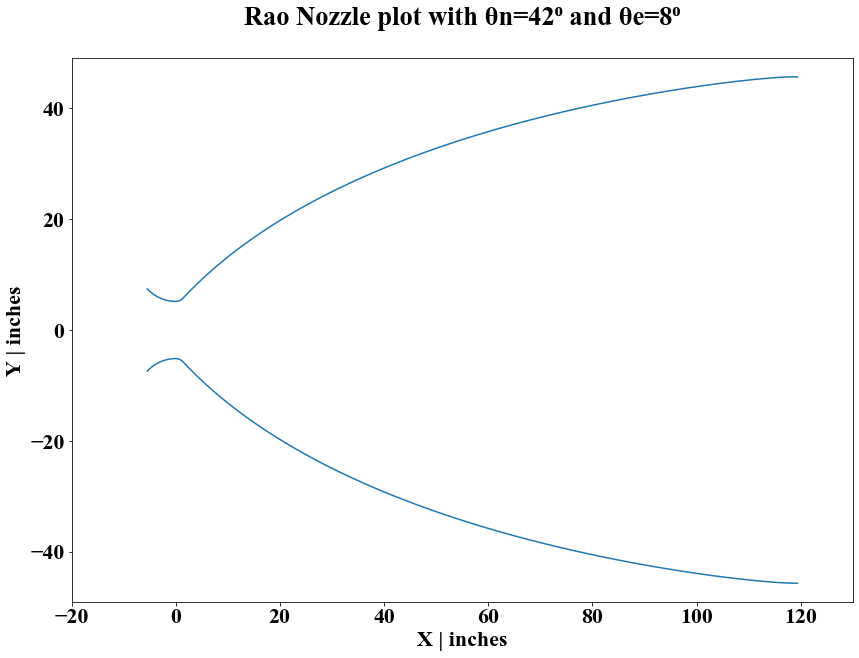

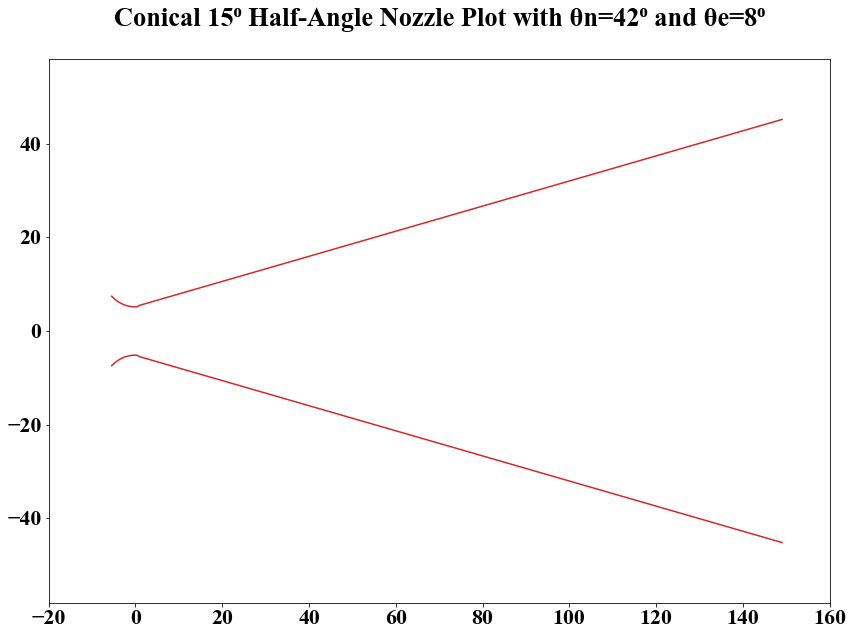

Plotted Data is populated


In [26]:
#Rao Nozzle Data

# Pre-setting Data Point Arrays
X=[]
Y=[]
X15=[]
Y15=[]
        
Rt=5.15          #Throat Radius | in
Ln=121           #Nozzle Length | in
AR=77.5          #Area Ratio | unitless 
θn=42            #Nozzle Throat Angle | Degrees
θe=8             #Nozzle Exit Back Angle | Degrees    
Re=Rt*(AR)**0.5  #Radius of Nozzle Exit | in
        
        # Converging Nozzle
for i in range (-135,-90,1):
    X.append(1.5*Rt*math.cos(math.radians(i)))
    Y.append(1.5*Rt*math.sin(math.radians(i))+1.5*Rt+Rt)
    X15.append(1.5*Rt*math.cos(math.radians(i)))
    Y15.append(1.5*Rt*math.sin(math.radians(i))+1.5*Rt+Rt)
        
            
# Throat and Circular Divergence
for i in range (-90,(θn-90),1):
    X.append(0.382*Rt*math.cos(math.radians(i)))
    Y.append(0.382*Rt*math.sin(math.radians(i))+0.382*Rt+Rt)
        
#For Conical Nozzle
for i in range (-90,(15-90),1):    
    X15.append(0.382*Rt*math.cos(math.radians(i)))
    Y15.append(0.382*Rt*math.sin(math.radians(i))+0.382*Rt+Rt)
        
# Bell Curve                                      
Ex=Ln                                                       #X-Coordinates defined from Length of Cone | in
Ey=Re                                                       #Y-Coordinates defined from Radius of Exit | in
Nx=0.382*Rt*math.cos(math.radians(θn-90))                   #X-Coordinates of inflection point | in
Ny=0.382*Rt*math.sin(math.radians(θn-90))+0.382*Rt+Rt       #Y-Coordinates of inflection point | in
m1=math.tan(math.radians(θn))                               #Gradient
m2=math.tan(math.radians(θe))                               #Gradient
C1=Ny-m1*Nx                                                 #Intercept
C2=Ey-m2*Ex                                                 #Intercept
Qx=(C2-C1)/(m1-m2)                                          #X-intercept @ pt Q | in
Qy=(m1*C2-m2*C1)/(m1-m2)                                    #Y-intercept @ pt Q | in
   
for t in range (0,100,1):
    t=t/100
    X.append(((1-t)**0.5)*Nx+2*(1-t)*t*Qx+(t**2)*Ex)
    Y.append(((1-t)**0.5)*Ny+2*(1-t)*t*Qy+(t**2)*Ey)
       
# Plotting the Bell Nozzle 


NegY=[i*-1 for i in Y]
plt.plot(X,Y,color='tab:blue')
plt.plot(X,NegY,color='tab:blue')
plt.xlabel('X | inches')
plt.ylabel('Y | inches')
plt.xlim([-20,130])
plt.ylim([-49,49])
plt.title('Rao Nozzle plot with θn=42⁰ and θe=8⁰\n')
plt.show()

#Conical 15⁰ Half-Angle Nozzle Points
Nx15=0.382*Rt*math.cos(math.radians(15-90))
Ny15=0.382*Rt*math.sin(math.radians(15-90))+0.382*Rt+Rt
        
xtemp=int(round(Nx))
while math.tan(math.radians(15))*xtemp+Ny15 < Re:
    X15.append(xtemp)
    Y15.append(math.tan(math.radians(15))*xtemp+Ny15)
    xtemp=xtemp+1
            
# Plotting 15 degree Half Angle Nozzle


NegY15=[i*-1 for i in Y15]
plt.plot(X15,Y15,color='tab:red')
plt.plot(X15,NegY15,color='tab:red')
plt.xlim([-20,160])
plt.ylim([-58,58])
plt.title('Conical 15⁰ Half-Angle Nozzle Plot with θn=42⁰ and θe=8⁰\n ')
plt.show()

from prettytable import PrettyTable

#table from list

def writetofile():
    import os
    outputname='Plotted Data'
    #X-coordinates
    a=X
    #Y-Coordinates
    b=Y
    #X15-Coordinates
    c=X15
    #Y15-Coordinates
    d=Y15
    
    #Opens the average.txt file and writes the passed data onto the txt file
    myfile=open(outputname,'w')
    myfile.write('X values are: '+str(a)+'\n')
    myfile.write('Y values are: '+str(b)+'\n')
    myfile.write('X15 values are: '+str(c)+'\n')
    myfile.write('Y15 values are: '+str(d)+'\n')
    
    myfile.close()
    
    if os.stat(outputname).st_size > 0:
        print("Plotted Data is populated")
    else:
        print("The output file is empty, need to check")
        
writetofile()

# Combustion Chamber Design